In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def df(x):
    return np.exp(-x)

In [6]:
#trapezoid
def trapezoid(df,N,a,b):
    lista = []
    while len(lista)<N:
        x = np.linspace(a,b,len(lista)+1)
        integ = 0
        for i in range(len(x)-1):
            integ += (1/2)*((x[i+1]-x[i])*(df(x[i+1])+ df(x[i])))
        lista.append(integ)
    return lista
#Simpson
def simpson(df,N,a,b):
    lista = []
    while len(lista)<2*N:
        if(len(lista)%2==1):
            dx = (b-a)/(len(lista)+1)
            x=[a]
            while len(x)<=len(lista)+1:
                x.append(x[-1]+dx)
            df1 = df(np.array(x))
            integ = (dx/3)*(df1[0] + df1[-1] + sum(4*df1[1:-1:2]) + sum(2*df1[2:-1:2]))
            lista.append(integ)
        else:
            lista.append(0)
    return lista[1::2]

#Gaussian
def gaussian(df,N,a,b):
    lista = []
    for i in range(1,N+1):
        yi, wi=np.polynomial.legendre.leggauss(i)
        xi = (yi/(1-yi**2))
        dw = ((1+yi**2)/(1-yi)**2)*wi
        df1 = dw*df(xi) 
        integ = sum(df1)
        lista.append(integ)
        #print(integ)
    return lista

In [4]:
def error(x):
    exact = np.ones(len(x))*(1 - np.exp(-1))
    return np.abs(x-exact)/exact[0]

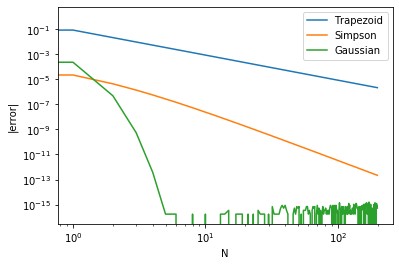

In [5]:
#Plot
a=0
b=1
N=200
plt.loglog(np.arange(N), error(trapezoid(df,N,a,b)), label='Trapezoid')
plt.loglog(np.arange(N), error(simpson(df,N,a,b)), label='Simpson')
plt.loglog(np.arange(N), error(gaussian(df,N,a,b)), label='Gaussian')
plt.xlabel('N')
plt.ylabel('|error|')
plt.legend()
plt.savefig('loginteg.png')

In [101]:
1- np.exp(-1)

0.6321205588285577